In [4]:
import cv2 
import matplotlib.pyplot as plt
import skimage as ski

In [5]:
img = cv2.imread('opp.jpg')
img.shape

(720, 1080, 3)

In [8]:
cv2.imshow('Image',img)
cv2.waitKey(0)

-1

In [ ]:
#IMAGE TYPE CONVERSIONS
      # Color Image to Grayscale
      # to Binary

# GEOMETRIC TRANSFORMATION
      # Scaling
      # Rotation
      # Cropping 

# IMAGE ARTHEMATIC / BRIGHTNESS, CONTRAST ADJUSTMENTS
      # Addition
      # Subtraction
      # Multiplication
      # Division
      # Brightness & Contrast Adjustment

# MORPHOLOGY
      # Structuring Elements
      # Opening
      # Closing
      # Erosion
      # Dialation

# FEATURE DETECTION

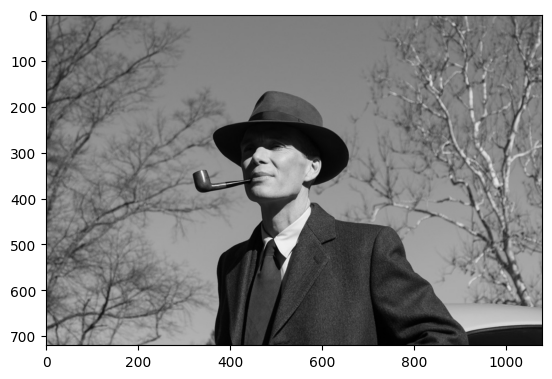

In [10]:
plt.imshow(img[:,:,::-1])

In [12]:
#Conversion to GrayScale
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

# 0.6+R +0.3*G +0.1*B


(720, 1080)

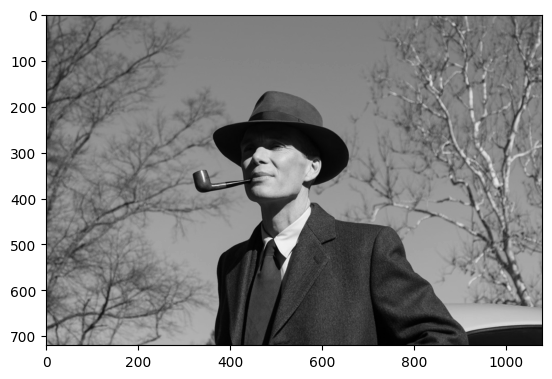

In [13]:
plt.imshow(img_gray, cmap ='gray')

In [16]:
#Conversion to Binary Image
# gray se b kr skta hu conversion or direct rgb se b. but gray se jyada meaningful hoga
th, img_bin = cv2.threshold(img_gray, 70,255, cv2.THRESH_BINARY)
img_bin.shape

(720, 1080)

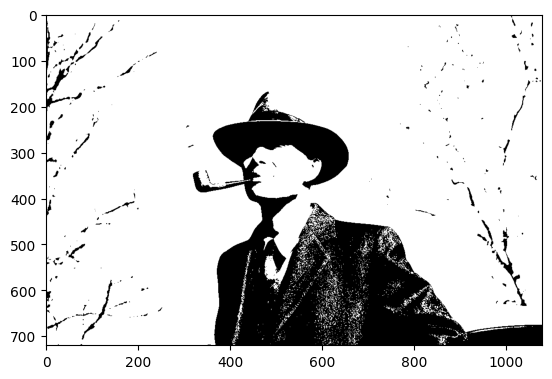

In [17]:
plt.imshow(img_bin , cmap ='gray')

(<matplotlib.image.AxesImage at 0x2a023b38ad0>,)

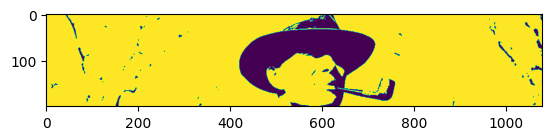

In [28]:
#Cropping
plt.imshow(img_bin[200:400,::-1]), #cmap = 'gray']

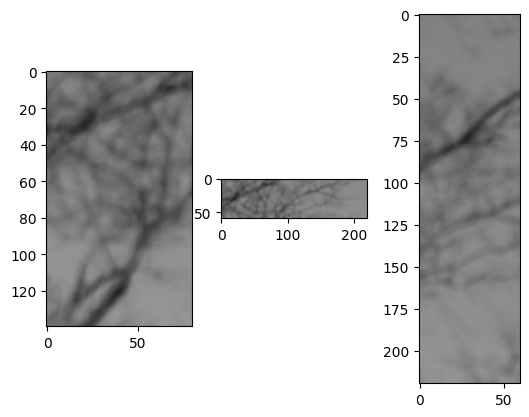

In [31]:
x,y,w,h = (50,150,80,140)
plt.subplot(1,3,1)                           # subplot to see al together
plt.imshow(img[y:y+h,x:x+w, ::-1])


x1,y1,x2,y2 = (50,150,270,210)
plt.subplot(1,3,2)
plt.imshow(img[y1:y2 ,x1:x2, ::-1])


y1,x1,y2,x2 = (50,150,270,210)
plt.subplot(1,3,3)
plt.imshow(img[y1:y2 ,x1:x2, ::-1])

In [32]:
# Scaling
img.shape

(720, 1080, 3)

In [45]:
img_large = cv2.resize(img, (1500,1500), interpolation = cv2.INTER_CUBIC)
img_large.shape

(1500, 1500, 3)

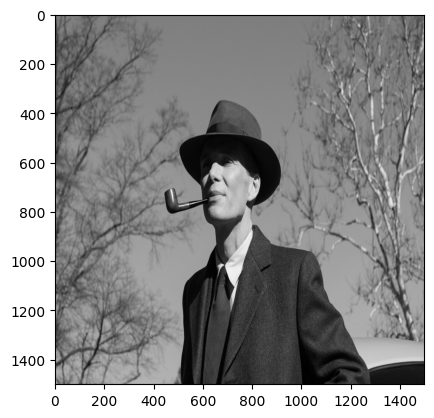

In [46]:
plt.imshow(img_large[:,:,::-1])

In [47]:
img_small = cv2.resize(
    img, (0,0),fx =0.25 , fy =0.25, interpolation = cv2.INTER_CUBIC)
img_small.shape

(180, 270, 3)

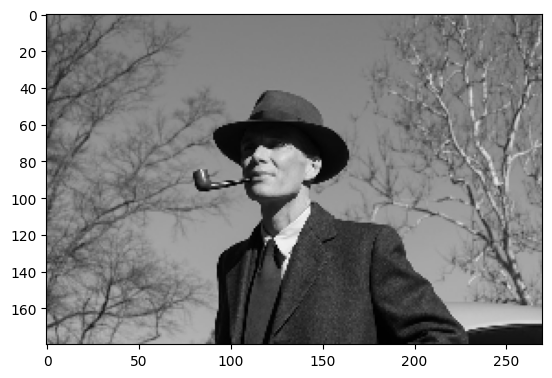

In [48]:
plt.imshow(img_small[:,:,::-1])

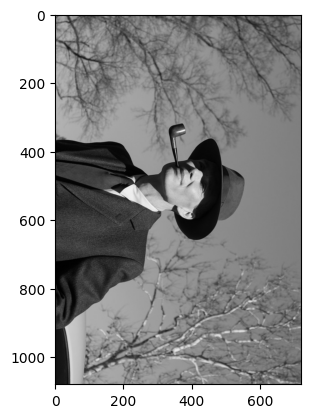

In [52]:
#Rotation

img_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(img_90[:,:,::-1])

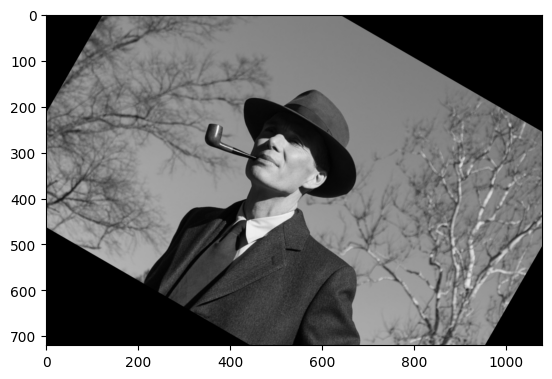

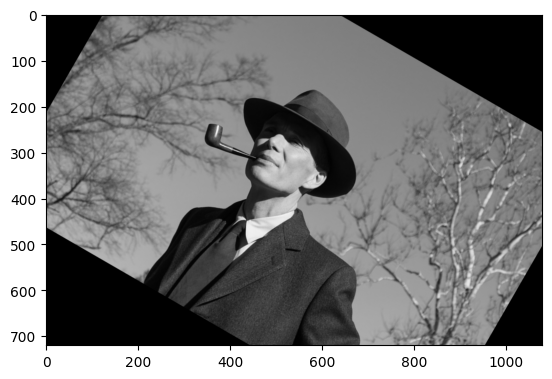

In [55]:
rot_mat = cv2.getRotationMatrix2D(
   center =(img.shape[1]//2,img.shape[0]//2) ,angle =-30,scale =1.0)
img_x = cv2.warpAffine(img, rot_mat, dsize = (img.shape[1], img.shape[0] ),
                       flags = cv2.INTER_LINEAR)
plt.imshow(img_x[:,:,::-1]);plt.show()

#approach that we will follow or easy

img_x = ski.transform.rotate(img, -30)
plt.imshow(img_x[:,:,::-1])